# Performance Evaluation Measures

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns   
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
import warnings
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
X = boston.iloc[:, :-1].values
y = boston['MEDV'].values

In [7]:
# test_size: percentage of total data used for testing
# random_state: keep starting point fixed, makes different models comparable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluation 1: Residual Analysis

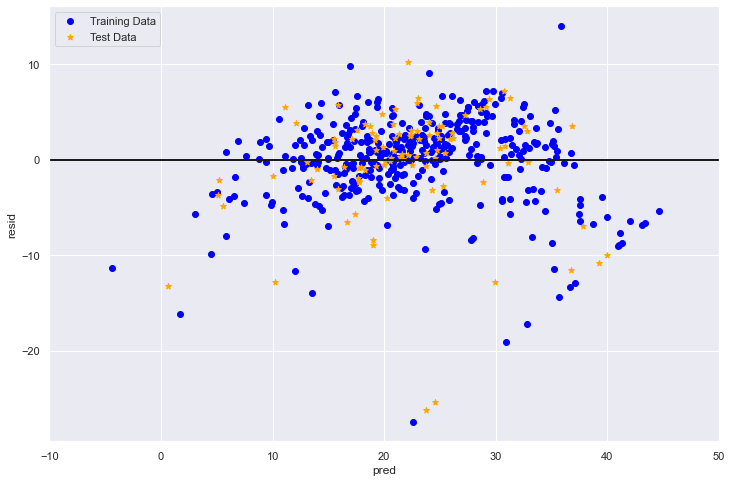

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(
    y_train_pred, y_train_pred - y_train, c='blue', marker = 'o', label='Training Data'
    )
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test Data'
)
plt.xlabel('pred')
plt.ylabel('resid')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10, xmax=50, lw=2, color='k')
plt.xlim(-10, 50)
plt.show()

# Evaluation 2: Mean Squared Error

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [20]:
mean_squared_error(y_test, y_test_pred)

33.44897999767653

# Evaluation 3: Coefficient of Determination (R<sup>2</sup>)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [23]:
r2_score(y_test, y_test_pred)

0.5892223849182507